# Title : Develop A Neural Network That Can Read Handwriting

In [2]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets,layers,models
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

# Download MNIST Dataset

In [3]:
(X_train, y_train) , (X_test, y_test) = keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [4]:
len(X_train)

60000

In [5]:
len(X_test)

10000

In [6]:
X_train[0].shape

(28, 28)

In [7]:
X_train[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
         18,  18,  18, 126, 136, 175,  26, 166, 255, 247, 127,   0,   0,
          0,   0],
       [  

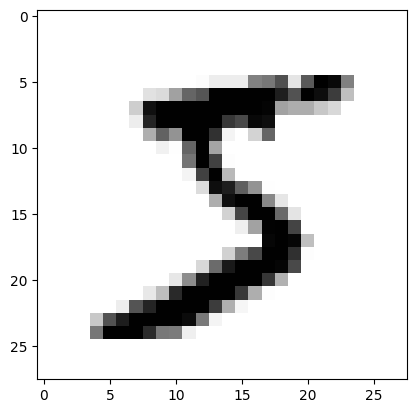

In [8]:
plt.imshow(X_train[0], cmap=plt.cm.gray_r,interpolation='nearest')

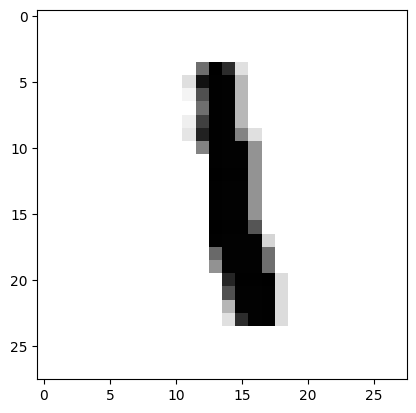

In [9]:
plt.imshow(X_train[6], cmap=plt.cm.gray_r,interpolation='nearest')

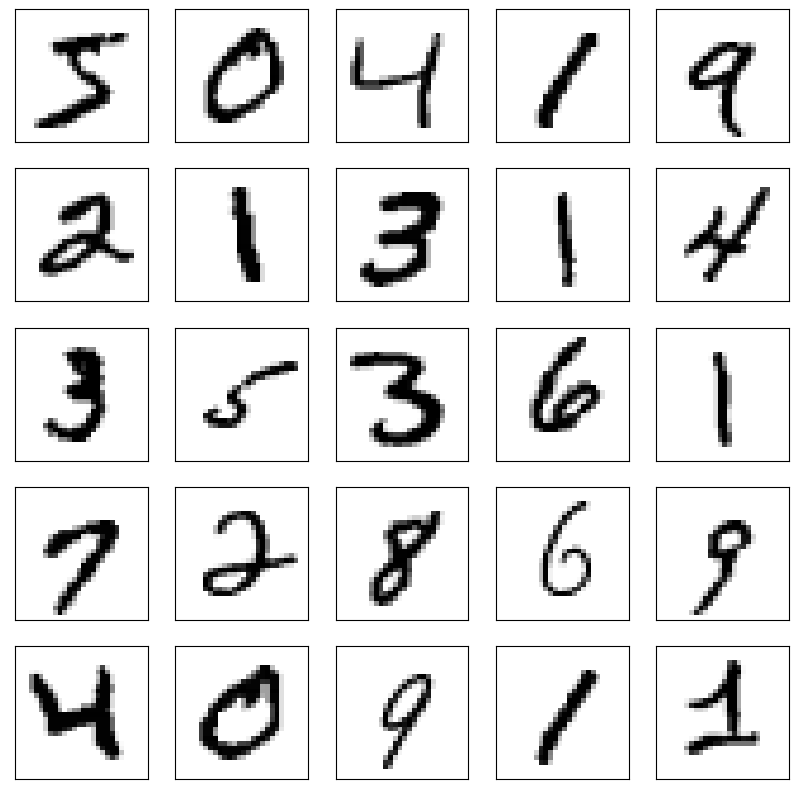

In [10]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
plt.show()

In [11]:
y_train[:5]

array([5, 0, 4, 1, 9], dtype=uint8)

# Flatten the Dataset

In [12]:
X_train=X_train/255
X_test=X_test/255

X_train_flattened = X_train.reshape(len(X_train), 28*28)
X_test_flattened = X_test.reshape(len(X_test), 28*28)

X_train_flattened.shape

(60000, 784)

In [13]:
X_train_flattened[0]

array([0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.        ,
       0.        , 0.        , 0.        , 0.        , 0.     

In [14]:
model = keras.Sequential([
    keras.layers.Dense(10, input_shape=(784,), activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 3s 1ms/step - loss: 0.4665 - accuracy: 0.8802
Epoch 2/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.3039 - accuracy: 0.9158
Epoch 3/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2835 - accuracy: 0.9204
Epoch 4/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2733 - accuracy: 0.9233
Epoch 5/5
1875/1875 [==============================] - 2s 1ms/step - loss: 0.2667 - accuracy: 0.9257


In [15]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 0s 966us/step - loss: 0.2658 - accuracy: 0.9255


[0.2657788097858429, 0.9254999756813049]

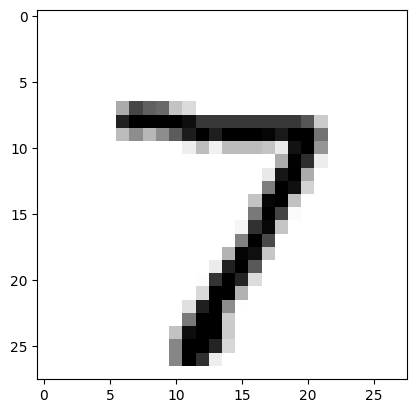

In [16]:
plt.imshow(X_test[0], cmap=plt.cm.gray_r,interpolation='nearest')

In [17]:
y_predicted=model.predict(X_test_flattened)
y_predicted[0]

313/313 [==============================] - 0s 883us/step


array([2.2329101e-02, 7.2855011e-07, 6.1144996e-02, 9.6539354e-01,
       2.4883861e-03, 1.1000546e-01, 1.1539314e-06, 9.9980271e-01,
       8.9544483e-02, 7.0160967e-01], dtype=float32)

In [18]:
np.argmax(y_predicted[0])

7

In [19]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

In [20]:
cm=tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)
cm

<tf.Tensor: shape=(10, 10), dtype=int32, numpy=
array([[ 958,    0,    2,    2,    0,    6,    6,    3,    2,    1],
       [   0, 1117,    3,    2,    0,    1,    4,    2,    6,    0],
       [   3,    9,  936,   17,    9,    3,   10,    8,   33,    4],
       [   1,    0,   22,  929,    0,   20,    1,   12,   18,    7],
       [   2,    2,    7,    1,  918,    0,    7,    4,    8,   33],
       [   8,    3,    8,   38,   11,  774,   11,    5,   28,    6],
       [  11,    3,    9,    1,    8,   14,  907,    2,    3,    0],
       [   1,    6,   24,    6,    8,    0,    0,  945,    1,   37],
       [   4,   12,    8,   29,    9,   23,    9,   13,  861,    6],
       [  10,    7,    1,   11,   33,    6,    0,   22,    9,  910]])>

Text(95.72222222222221, 0.5, 'Truth')

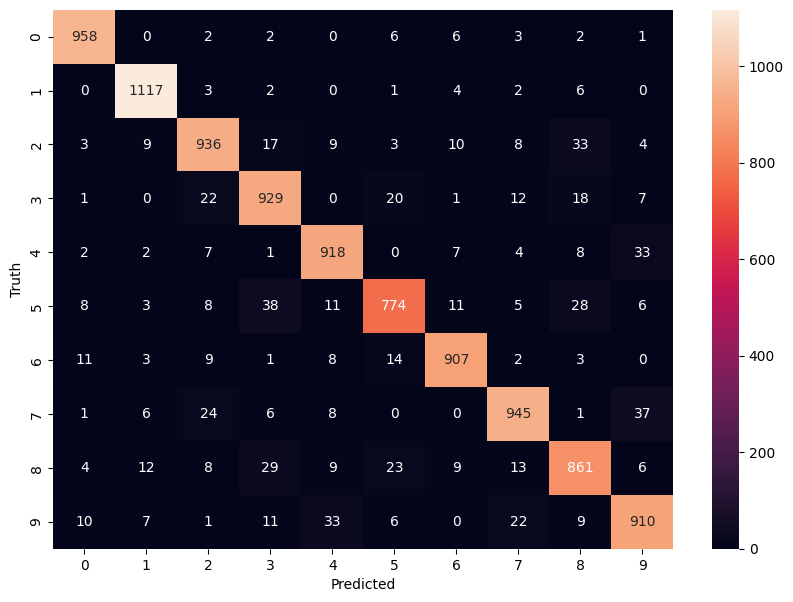

In [21]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')

# Using Hidden Layer

In [22]:
model = keras.Sequential([
    keras.layers.Dense(100, input_shape=(784,), activation='relu'),
    keras.layers.Dense(10, activation='sigmoid')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

model.fit(X_train_flattened, y_train, epochs=5)

Epoch 1/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.2691 - accuracy: 0.9233
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1202 - accuracy: 0.9647
Epoch 3/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0841 - accuracy: 0.9749
Epoch 4/5
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0646 - accuracy: 0.9808
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0508 - accuracy: 0.9847


In [23]:
model.evaluate(X_test_flattened,y_test)

313/313 [==============================] - 1s 1ms/step - loss: 0.0785 - accuracy: 0.9758


[0.07847991585731506, 0.9757999777793884]

In [24]:
y_predicted_labels = [np.argmax(i) for i in y_predicted]
y_predicted_labels[:10]

[7, 2, 1, 0, 4, 1, 4, 9, 6, 9]

313/313 [==============================] - 0s 1ms/step


Text(95.72222222222221, 0.5, 'Truth')

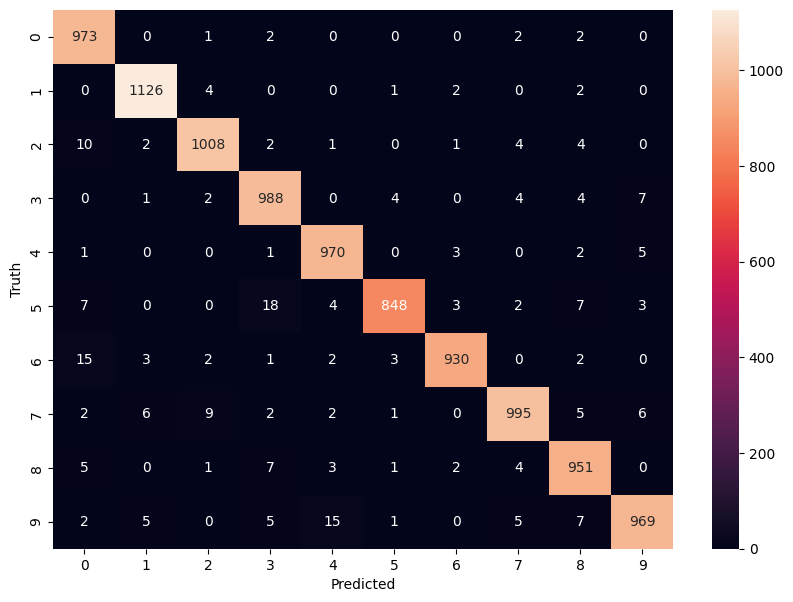

In [25]:
y_predicted = model.predict(X_test_flattened)
y_predicted_labels = [np.argmax(i) for i in y_predicted]
cm = tf.math.confusion_matrix(labels=y_test,predictions=y_predicted_labels)

plt.figure(figsize = (10,7))
sn.heatmap(cm, annot=True, fmt='d')
plt.xlabel('Predicted')
plt.ylabel('Truth')